In [1]:
import pyforest
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import missingno as msno

In [2]:
df = pd.read_csv('/Users/aarjavsanghvi/Documents/datasets/stbt_fraud.csv')

<IPython.core.display.Javascript object>

In [3]:
df1 = pd.read_csv('/Users/aarjavsanghvi/Documents/datasets/stbt_active.csv')

<IPython.core.display.Javascript object>

In [4]:
df.shape

(2390, 20)

In [5]:
df1.shape

(34415, 20)

In [6]:
df.head()

,account_id,given_name,family_name,date_of_birth,created_at,status,country_of_citizenship,country_of_tax_residence,postal_code,state,street_address,ip_address,annual_income_min,annual_income_max,liquid_net_worth_max,liquid_net_worth_min,phone_number,employer,employer_address,position
0,000defcc-4429-4a49-bd3f-e4d70238b5ae,Valentina,Gonzalez,1992-09-04,2021-12-16T15:02:04.578509-08:00,REJECTED,USA,USA,14605,NY,"{""219 Hebard St""}",84.17.41.86,25000,99999,99999,25000,+1 5853513424,NaN,NaN,NaN
1,001d5e98-45f2-48e7-98c4-42507b1eaae8,Jason,Hughes,1984-11-04,2021-12-23T03:21:03.777897-08:00,REJECTED,USA,USA,79703,TX,"{""3415 Princeton Ave""}",108.230.165.252,0,25000,25000,0,+1 7046946354,NaN,NaN,NaN
2,001f6d76-4d59-47f6-93c3-703b47c74b64,Tammy,Johnson,1968-09-20,2021-12-22T05:28:32.016668-08:00,REJECTED,USA,USA,48205,MI,"{""15650 Lappin Ave""}",98.113.199.254,0,25000,25000,0,+1 2105989150,NaN,NaN,NaN
3,002025fe-6245-4aa2-866a-02645ed0f18f,William H,Shifflett Jr,1965-05-10,2021-12-08T09:02:06.72962-08:00,REJECTED,USA,USA,22827,VA,"{""1496 Mill Ln""}",107.77.204.140,0,25000,25000,0,+1 5405609611,Self,"1496 Mill Lane, Elkton, VA, USA",Labor
4,0020c424-326c-422d-8063-f1a77cfa4fa3,Linda,Johnson,1952-04-26,2021-12-22T13:17:49.275358-08:00,REJECTED,USA,USA,30344,GA,"{""3230 Dodson Drive Connector""}",98.191.192.44,25000,99999,99999,25000,+1 2256205429,NaN,NaN,NaN


In [7]:
df1.head()

,account_id,given_name,family_name,date_of_birth,created_at,status,country_of_citizenship,country_of_tax_residence,postal_code,state,street_address,ip_address,annual_income_min,annual_income_max,liquid_net_worth_max,liquid_net_worth_min,phone_number,employer,employer_address,position
0,0000fe49-eb5e-438d-994c-47c26c44e300,Linda Donata,Citro,2002-03-25,2022-01-25T08:35:05.246947-08:00,ACTIVE,ITA,ITA,84121,Campania,"{"" Via Romualdo II Guarna"",29}",5.169.30.51,0.0,25000.0,25000.0,0.0,+393348207773,NaN,NaN,NaN
1,00086279-693a-482e-a10e-1013bf53c45a,Kayla Mae,Anderson,1987-11-24,2022-01-31T23:18:14.659265-08:00,ACTIVE,USA,USA,45204,OH,"{""3801 Hillside Ave""}",172.58.160.225,0.0,25000.0,25000.0,0.0,+15133560513,Home Healthcare,"1210 River Road, Cincinnati, OH, USA",Aid
2,000abdea-9f26-4495-b959-fcc86d9e39c8,Zachary Heath,Weger,1990-06-11,2022-01-23T01:02:46.765511-08:00,ACTIVE,USA,USA,73080,OK,"{""23899 State Hwy 74""}",164.90.42.46,0.0,25000.0,25000.0,0.0,+15014638033,NaN,NaN,NaN
3,000e12d4-8d85-4f96-9b0d-63ea1fd557aa,Joshua Ray,Schaeffer,1995-06-16,2021-12-17T00:13:13.011071-08:00,ACTIVE,USA,USA,76048,TX,"{""1525 2nd St"",201}",2600:387:f:4536::3,0.0,25000.0,25000.0,0.0,+1 2547845278,NaN,NaN,NaN
4,000f5ec0-d2ee-43e1-bb31-4b5fd733a667,Matteo,Stucchi,1976-04-28,2022-01-29T02:22:52.608794-08:00,ACTIVE,ITA,ITA,47843,Emilia-Romagna,"{"" Via Palestrina"",""N 61""}",87.19.187.42,25000.0,99999.0,25000.0,0.0,+393486604479,Hospital Ceccarini,"Via Frosinone, 7, Riccione, Province of Rimini...",Paramedic


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   account_id                2390 non-null   object
 1   given_name                2390 non-null   object
 2   family_name               2390 non-null   object
 3   date_of_birth             2390 non-null   object
 4   created_at                2390 non-null   object
 5   status                    2390 non-null   object
 6   country_of_citizenship    2390 non-null   object
 7   country_of_tax_residence  2390 non-null   object
 8   postal_code               2390 non-null   object
 9   state                     2390 non-null   object
 10  street_address            2390 non-null   object
 11  ip_address                2390 non-null   object
 12  annual_income_min         2390 non-null   int64 
 13  annual_income_max         2390 non-null   int64 
 14  liquid_net_worth_max    

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34415 entries, 0 to 34414
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_id                34415 non-null  object 
 1   given_name                34415 non-null  object 
 2   family_name               34415 non-null  object 
 3   date_of_birth             34410 non-null  object 
 4   created_at                34415 non-null  object 
 5   status                    34415 non-null  object 
 6   country_of_citizenship    34410 non-null  object 
 7   country_of_tax_residence  34415 non-null  object 
 8   postal_code               34414 non-null  object 
 9   state                     34415 non-null  object 
 10  street_address            34415 non-null  object 
 11  ip_address                34410 non-null  object 
 12  annual_income_min         34401 non-null  float64
 13  annual_income_max         34401 non-null  float64
 14  liquid

In [10]:
df.drop(['account_id','given_name','family_name','date_of_birth','status',
         'country_of_citizenship','street_address','created_at','employer_address','phone_number'],
        axis=1, inplace=True)

In [11]:
df1.drop(['account_id','given_name','family_name','date_of_birth','status',
          'country_of_citizenship','street_address','created_at','employer_address','phone_number'],
         axis=1, inplace=True)

In [12]:
df.shape

(2390, 10)

In [13]:
df1.shape

(34415, 10)

In [14]:
print(len(pd.unique(df['employer'])))
print(len(pd.unique(df['position'])))

<IPython.core.display.Javascript object>

480


<IPython.core.display.Javascript object>

320


<AxesSubplot:>

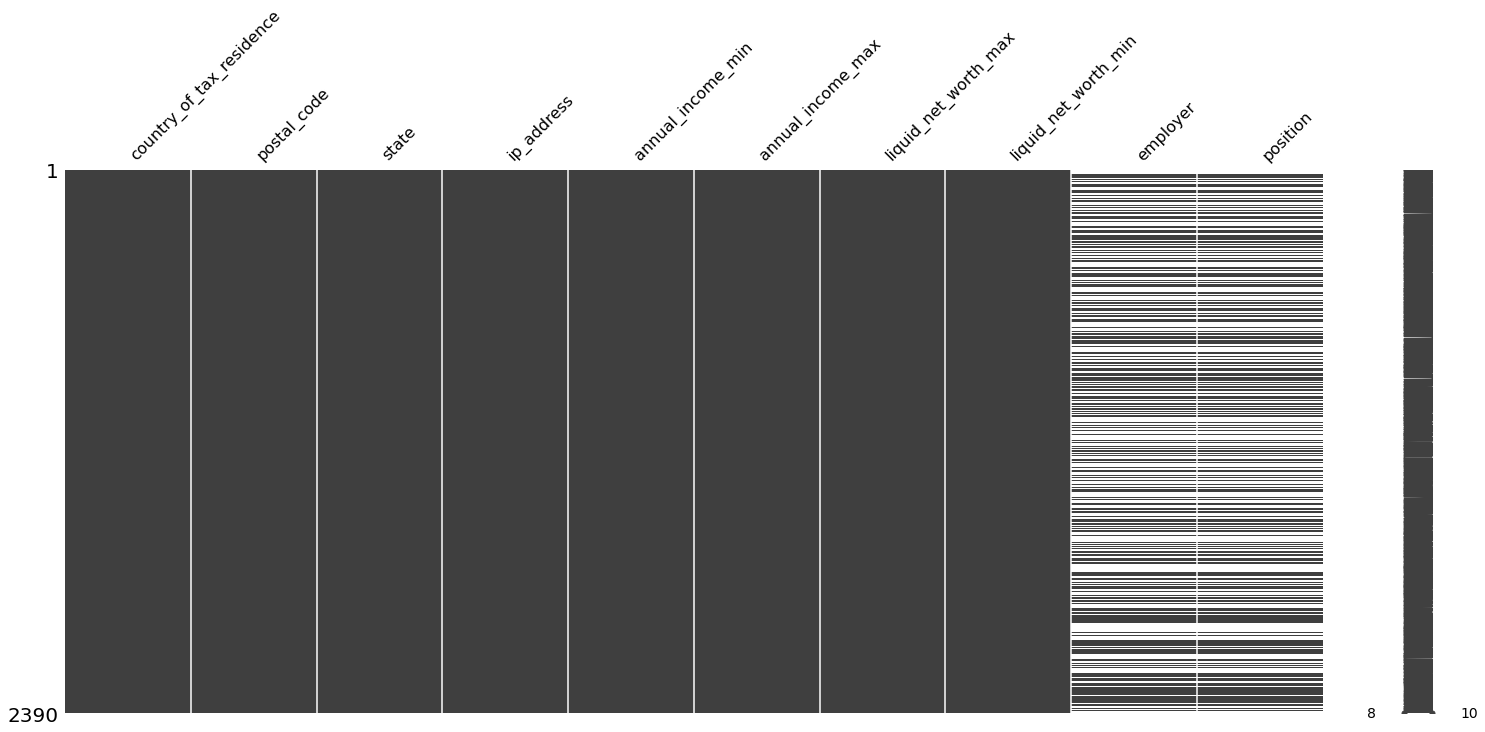

In [15]:
msno.matrix(df)

In [16]:
df = df.ffill(axis=0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   country_of_tax_residence  2390 non-null   object
 1   postal_code               2390 non-null   object
 2   state                     2390 non-null   object
 3   ip_address                2390 non-null   object
 4   annual_income_min         2390 non-null   int64 
 5   annual_income_max         2390 non-null   int64 
 6   liquid_net_worth_max      2390 non-null   int64 
 7   liquid_net_worth_min      2390 non-null   int64 
 8   employer                  2387 non-null   object
 9   position                  2387 non-null   object
dtypes: int64(4), object(6)
memory usage: 186.8+ KB


In [18]:
df_fraud = df.dropna()

In [19]:
df_active = df1.dropna()

In [20]:
df_fraud.isna().value_counts()

country_of_tax_residence  postal_code  state  ip_address  annual_income_min  annual_income_max  liquid_net_worth_max  liquid_net_worth_min  employer  position
False                     False        False  False       False              False              False                 False                 False     False       2387
dtype: int64

In [21]:
df_active.isna().value_counts()

country_of_tax_residence  postal_code  state  ip_address  annual_income_min  annual_income_max  liquid_net_worth_max  liquid_net_worth_min  employer  position
False                     False        False  False       False              False              False                 False                 False     False       15426
dtype: int64

In [22]:
df_active.shape

(15426, 10)

In [23]:
df_fraud.shape

(2387, 10)

In [24]:
df_fraud.insert(1,'class',1)
df_active.insert(1,'class',0)

In [25]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387 entries, 3 to 2389
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   country_of_tax_residence  2387 non-null   object
 1   class                     2387 non-null   int64 
 2   postal_code               2387 non-null   object
 3   state                     2387 non-null   object
 4   ip_address                2387 non-null   object
 5   annual_income_min         2387 non-null   int64 
 6   annual_income_max         2387 non-null   int64 
 7   liquid_net_worth_max      2387 non-null   int64 
 8   liquid_net_worth_min      2387 non-null   int64 
 9   employer                  2387 non-null   object
 10  position                  2387 non-null   object
dtypes: int64(5), object(6)
memory usage: 223.8+ KB


In [26]:
df_fraud

,country_of_tax_residence,class,postal_code,state,ip_address,annual_income_min,annual_income_max,liquid_net_worth_max,liquid_net_worth_min,employer,position
3,USA,1,22827,VA,107.77.204.140,0,25000,25000,0,Self,Labor
4,USA,1,30344,GA,98.191.192.44,25000,99999,99999,25000,Self,Labor
5,USA,1,36108,AL,75.76.123.186,0,25000,25000,0,Self,Labor
6,USA,1,24148,VA,68.228.74.65,0,25000,25000,0,Self,Labor
7,USA,1,90303,CA,24.169.0.18,25000,99999,499999,100000,Suzanne Parks Company,Manager
...,...,...,...,...,...,...,...,...,...,...,...
2385,USA,1,36110,AL,24.17.244.81,25000,99999,499999,100000,Computer Repair,manager
2386,USA,1,77096,TX,207.182.85.109,25000,99999,99999,25000,Google,manager
2387,USA,1,77705,TX,92.119.177.20,0,25000,25000,0,Google,manager
2388,USA,1,16503,PA,108.74.223.205,0,25000,25000,0,Google,manager


In [27]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15426 entries, 1 to 34412
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_of_tax_residence  15426 non-null  object 
 1   class                     15426 non-null  int64  
 2   postal_code               15426 non-null  object 
 3   state                     15426 non-null  object 
 4   ip_address                15426 non-null  object 
 5   annual_income_min         15426 non-null  float64
 6   annual_income_max         15426 non-null  float64
 7   liquid_net_worth_max      15426 non-null  float64
 8   liquid_net_worth_min      15426 non-null  float64
 9   employer                  15426 non-null  object 
 10  position                  15426 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB


In [28]:
#sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
#oversampled_X, oversampled_Y = sm.fit_resample(df_fraud.drop('class', axis=1), df_fraud['class'])
#oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [29]:
df3 = df_fraud.append(df_active)
df3.head()
df3.shape

(17813, 11)

In [30]:
#create two different dataframe of majority and minority class 
df_majority = df3[(df3['class']==0)] 
df_minority = df3[(df3['class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 15426, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<IPython.core.display.Javascript object>

In [31]:
print(df_minority_upsampled.info())
print(df_majority.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15426 entries, 863 to 1040
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_of_tax_residence  15426 non-null  object 
 1   class                     15426 non-null  int64  
 2   postal_code               15426 non-null  object 
 3   state                     15426 non-null  object 
 4   ip_address                15426 non-null  object 
 5   annual_income_min         15426 non-null  float64
 6   annual_income_max         15426 non-null  float64
 7   liquid_net_worth_max      15426 non-null  float64
 8   liquid_net_worth_min      15426 non-null  float64
 9   employer                  15426 non-null  object 
 10  position                  15426 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15426 entries, 1 to 34412
Data columns (total 11 columns):

In [32]:
len(df_minority_upsampled)

15426

In [34]:
labelencoder = LabelEncoder()
df_upsampled['country_of_tax_residence'] = labelencoder.fit_transform(df_upsampled['country_of_tax_residence'])
df_upsampled['state'] = labelencoder.fit_transform(df_upsampled['state'])
df_upsampled['employer'] = labelencoder.fit_transform(df_upsampled['employer'])
df_upsampled['position'] = labelencoder.fit_transform(df_upsampled['position'])
df_upsampled['ip_address'] = labelencoder.fit_transform(df_upsampled['ip_address'])
df_upsampled['postal_code'] = labelencoder.fit_transform(df_upsampled['postal_code'])

In [35]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30852 entries, 863 to 34412
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_of_tax_residence  30852 non-null  int64  
 1   class                     30852 non-null  int64  
 2   postal_code               30852 non-null  int64  
 3   state                     30852 non-null  int64  
 4   ip_address                30852 non-null  int64  
 5   annual_income_min         30852 non-null  float64
 6   annual_income_max         30852 non-null  float64
 7   liquid_net_worth_max      30852 non-null  float64
 8   liquid_net_worth_min      30852 non-null  float64
 9   employer                  30852 non-null  int64  
 10  position                  30852 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.8 MB


In [36]:
df_upsampled.nunique(axis=0)

country_of_tax_residence       27
class                           2
postal_code                  9264
state                         486
ip_address                  14901
annual_income_min               5
annual_income_max               5
liquid_net_worth_max            5
liquid_net_worth_min            5
employer                    11451
position                     5881
dtype: int64

In [37]:
X = df_upsampled.loc[:, df3.columns!='class']
y = df_upsampled['class']

# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [44]:
#Hyper parameter optimization
params={
   "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    "min_child_weight": [1,3,5,7,9],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7]
}

In [45]:
classifier=xgboost.XGBClassifier()

In [46]:
random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, n_jobs=-1, cv=5,verbose=0)

In [47]:
random_search.fit(X_train, y_train)

/Users/aarjavsanghvi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/aarjavsanghvi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/aarjavsanghvi/opt/anaconda3/lib/python3.9/sit

[11:05:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [48]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=10, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [49]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=20,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
classifier.fit(X_train, y_train)

[11:07:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=20,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))

[[4393  300]
 [  38 4525]]


In [52]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

0.9634831460674157
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4693
           1       0.94      0.99      0.96      4563

    accuracy                           0.96      9256
   macro avg       0.96      0.96      0.96      9256
weighted avg       0.97      0.96      0.96      9256

[11:04:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:04:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha